In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import logging
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from underthesea import word_tokenize, pos_tag
from gensim.models import Word2Vec
from collections import Counter
from pyvi import ViTokenizer
import seaborn as sns
import re

In [117]:
df = pd.read_csv("/content/coopmart_review_sentiment.csv")
df

,comment,stars,sentiment
0,nhiều hàng hoá để lựa chọn thường xuyên có chư...,5,Trung tính
1,dịch vụ tốt,5,Tích cực
2,hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở q...,1,Trung tính
3,nhân viên tính tiền thái độ khó chịu ra mặt,1,Tiêu cực
4,thật tuyệt,5,Tích cực
...,...,...,...
31751,tốt,4,Tích cực
31752,tốt,4,Tích cực
31753,tốt,4,Tích cực
31754,tuyệt,4,Tích cực


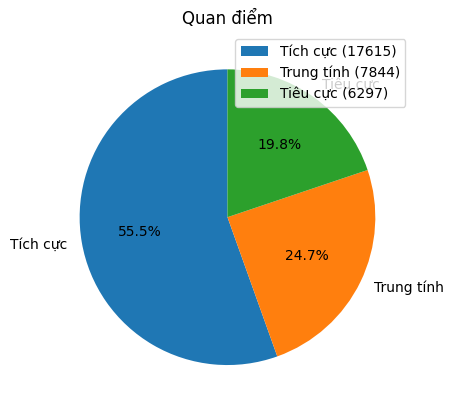

In [118]:
counts = df['sentiment'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Quan điểm')
plt.legend([f"{i} ({c})" for i, c in zip(counts.index, counts.values)])
plt.show()

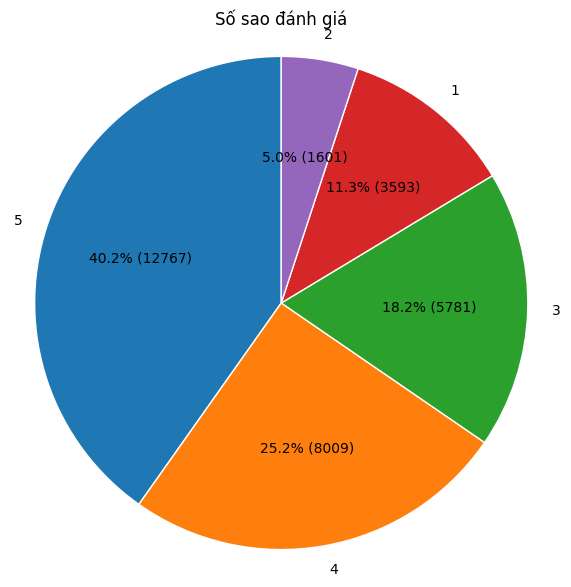

In [119]:
counts = df['stars'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    counts,
    labels=counts.index,
    startangle=90,
    wedgeprops={'edgecolor': 'white'},
    autopct=lambda pct: f'{pct:.1f}% ({int(pct*counts.sum()/100)})'
)

plt.title('Số sao đánh giá')
plt.axis('equal')
plt.show()


# Phân tích các bình luận tiêu cực, trung tính

In [120]:
df = df[(df['sentiment'] =='Tiêu cực') | (df['sentiment'] == 'Trung tính')]
df

,comment,stars,sentiment
0,nhiều hàng hoá để lựa chọn thường xuyên có chư...,5,Trung tính
2,hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở q...,1,Trung tính
3,nhân viên tính tiền thái độ khó chịu ra mặt,1,Tiêu cực
5,không gian mua sắm thoải mái khách vắng đi nhi...,4,Trung tính
6,hôm qua em có đến đây mua ít đồ bạn em bảo xin...,1,Trung tính
...,...,...,...
31744,được rồi,5,Trung tính
31745,được rồi,5,Trung tính
31746,được rồi,5,Trung tính
31747,được rồi,5,Trung tính


In [121]:
stopword1 = set(open('/content/vietnamese-stopwords-dash.txt', encoding='utf-8').read().split())
stopword2 = set(open('/content/vietnamese-stopwords.txt', encoding='utf-8').read().split())

STOPWORDS = stopword1 | stopword2


In [122]:
def remove_stopwords(words):
    return ' '.join(w for w in words if w not in STOPWORDS)



In [123]:
def wt(sentence):
    tokens = word_tokenize(sentence, format = 'text').split()
    return tokens

In [124]:
df['preprocess'] = df['comment'].apply(wt).apply(remove_stopwords)

/tmp/ipython-input-16480702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocess'] = df['comment'].apply(wt).apply(remove_stopwords)


In [125]:
df1 = df[df['preprocess'].str.strip().astype(bool)]
df = df[['comment','preprocess']]

In [126]:
df

,comment,preprocess
0,nhiều hàng hoá để lựa chọn thường xuyên có chư...,hàng hóa lựa_chọn thường_xuyên chương_trình kh...
2,hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở q...,hôm_nay tầm tiền quầy thu ngân_tầng bích trườn...
3,nhân viên tính tiền thái độ khó chịu ra mặt,nhân_viên tiền thái_độ khó_chịu mặt
5,không gian mua sắm thoải mái khách vắng đi nhi...,không_gian mua_sắm thoải_mái vắng gigamall mở_cửa
6,hôm qua em có đến đây mua ít đồ bạn em bảo xin...,hôm_qua mua bảo_xinh chụp quầy cân hoa_quả nhâ...
...,...,...
31744,được rồi,
31745,được rồi,
31746,được rồi,
31747,được rồi,


# POS TAGGING

In [127]:
pos_negative = []
for i in df['preprocess']:
  pos = pos_tag(str(i))
  pos_negative.append(pos)

In [128]:
pos_negative

[[('hàng', 'N'),
  ('hóa', 'V'),
  ('lựa_chọn', 'N'),
  ('thường_xuyên', 'N'),
  ('chương_trình', 'V'),
  ('khuyến_mãi', 'N'),
  ('nhân_viên', 'V'),
  ('vui_vẻ', 'N'),
  ('nhiệt_tình', 'M')],
 [('hôm_nay', 'V'),
  ('tầm', 'N'),
  ('tiền', 'N'),
  ('quầy', 'N'),
  ('thu', 'V'),
  ('ngân_tầng', 'N'),
  ('bích', 'V'),
  ('trường_hợp', 'N'),
  ('nhân_viên', 'V'),
  ('thái_độ', 'N'),
  ('ra_mặt', 'V'),
  ('vợ', 'N'),
  ('khách_hàng', 'V'),
  ('thẻ', 'N'),
  ('bạch_kim', 'V'),
  ('tiền', 'N'),
  ('lỗ_tai', 'N'),
  ('ngoáy', 'V'),
  ('tận', 'E'),
  ('tiền', 'N'),
  ('quăng', 'V'),
  ('món', 'N'),
  ('hàng', 'N'),
  ('thái_độ', 'N'),
  ('khó_chịu', 'A'),
  ('tiếng', 'N'),
  ('thái_độ', 'V'),
  ('nhân_viên', 'V'),
  ('thấp_kém', 'N'),
  ('vô_văn_hóa', 'V'),
  ('mua', 'V'),
  ('hàng', 'N'),
  ('cảm_xúc', 'N'),
  ('tiêu_cực', 'N'),
  ('hình_ảnh mong', 'V'),
  ('đọc', 'V'),
  ('ráng', 'V'),
  ('cải_thiện', 'V'),
  ('giúp', 'V')],
 [('nhân_viên', 'V'),
  ('tiền', 'N'),
  ('thái_độ', 'V'),
  ('khó_c

In [129]:
nouns = []

for sentence in pos_negative:
    for word, tag in sentence:
        if tag == 'N':
            nouns.append(word)


In [130]:
verbs = []

for sentence in pos_negative:
    for word, tag in sentence:
        if tag == 'V':
            verbs.append(word)

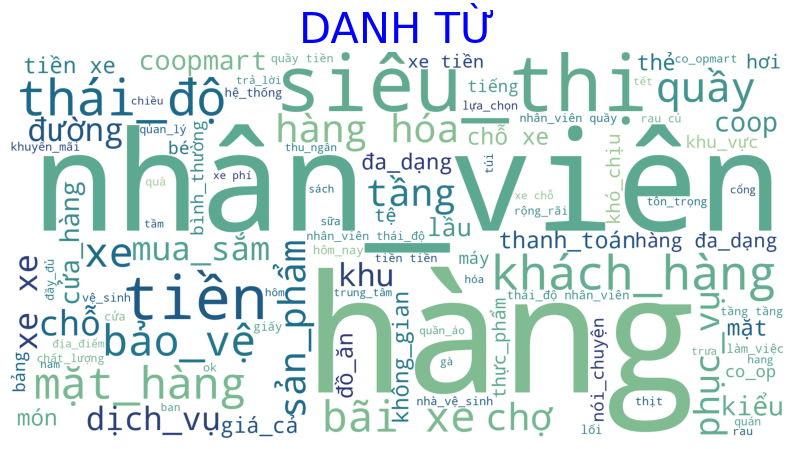

In [131]:
from wordcloud import WordCloud

cloud = " ".join(nouns)

plt.figure(figsize=(10, 8))
wc = WordCloud(
    max_words=100,
    background_color="white",
    colormap=sns.color_palette("crest", as_cmap=True),
    width=2000, height=1000
).generate(cloud)

plt.imshow(wc)
plt.axis("off")
plt.title("DANH TỪ", fontsize=30, color="blue")
plt.show()


In [132]:
noun_counts = Counter(nouns)

top_5_nouns = noun_counts.most_common(5)
print(top_5_nouns)


[('hàng', 3019), ('xe', 2323), ('nhân_viên', 2001), ('siêu_thị', 1488), ('tiền', 1468)]


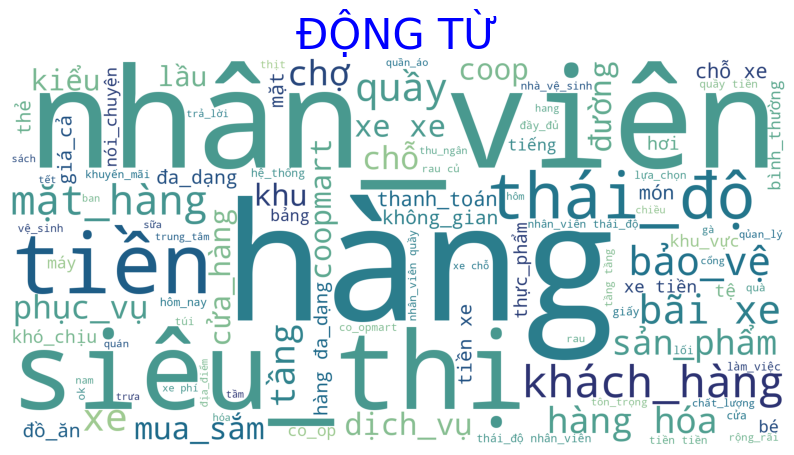

In [133]:
loud = " ".join(verbs)

plt.figure(figsize=(10, 8))
wc = WordCloud(
    max_words=100,
    background_color="white",
    colormap=sns.color_palette("crest", as_cmap=True),
    width=2000, height=1000
).generate(cloud)

plt.imshow(wc)
plt.axis("off")
plt.title("ĐỘNG TỪ", fontsize=30, color="blue")
plt.show()

In [134]:
verb_counts = Counter(verbs)
top_5_verbs = verb_counts.most_common(5)
print(top_5_verbs)


[('mua', 2204), ('nhân_viên', 1052), ('gửi', 739), ('hóa', 645), ('siêu_thị', 636)]


# TÌM CÁC TỪ GẦN NGHĨA

In [135]:
df2 = df['comment']

In [136]:
df2 = df['comment']
tokenized_data = df2.to_list()
tokenized_data = [word_tokenize(cmt,format = 'text').split() for cmt in tokenized_data]

In [137]:
tokenized_data[:3]

[['nhiều',
  'hàng',
  'hóa',
  'để',
  'lựa_chọn',
  'thường_xuyên',
  'có',
  'chương_trình',
  'khuyến_mãi',
  'nhân_viên',
  'vui_vẻ',
  'nhiệt_tình'],
 ['hôm_nay',
  'ngày',
  'lúc',
  'tầm',
  'giờ',
  'giờ',
  'tôi',
  'tính',
  'tiền',
  'ở',
  'quầy',
  'thu',
  'ngân_tầng',
  'trệt',
  'tên',
  'là',
  'bích',
  'tôi',
  'gặp',
  'trường_hợp',
  'như',
  'sau',
  'chị',
  'nhân_viên',
  'thái_độ',
  'với',
  'khách',
  'với',
  'tôi',
  'ra_mặt',
  'luôn',
  'không',
  'hiểu',
  'chị',
  'gặp',
  'vấn_đề',
  'gì',
  'nữa',
  'chắc',
  'tới',
  'tháng',
  'vợ',
  'tôi',
  'là',
  'khách_hàng',
  'thẻ',
  'bạch_kim',
  'không',
  'nhiều',
  'cũng',
  'không',
  'ít',
  'trong',
  'lúc',
  'tính',
  'tiền',
  'không',
  'hiểu',
  'lỗ_tai',
  'chị',
  'có',
  'bị',
  'tật',
  'hay',
  'chưa',
  'ngoáy',
  'hỏi',
  'cùng',
  'câu',
  'hỏi',
  'tới',
  'tận',
  'lần',
  'mà',
  'đến',
  'câu',
  'hỏi',
  'lúc',
  'tính',
  'tiền',
  'thì',
  'chị',
  'đó',
  'quăng',
  'những',
  '

In [138]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
model = Word2Vec(tokenized_data, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [139]:
len(model.wv.key_to_index)

2724

In [140]:
model.wv.similar_by_word("hàng")

[('hàng_không', 0.8184453845024109),
 ('sắp_xếp_hàng', 0.7198992967605591),
 ('dồi_dào', 0.7135847210884094),
 ('nghèo_nàn', 0.6837934255599976),
 ('đơn_từ', 0.6726573705673218),
 ('đơn', 0.6710818409919739),
 ('ưu_đãi', 0.6701736450195312),
 ('mẫu_mã', 0.66683429479599),
 ('đồ_đạc', 0.6651944518089294),
 ('chủng_loại', 0.6649014353752136)]

In [141]:
model.wv.similar_by_word("nhân_viên")

[('dễ_thương', 0.7963396310806274),
 ('vui_vẻ', 0.7646500468254089),
 ('thu_ngân', 0.7605887055397034),
 ('niềm_nở', 0.7546678781509399),
 ('chậm_chạp', 0.7503270506858826),
 ('khách_hàng_không', 0.739578366279602),
 ('khâu', 0.7367435693740845),
 ('lồi_lõm', 0.7359540462493896),
 ('trống_không', 0.7331449389457703),
 ('lòi_lõm', 0.7308890223503113)]

In [142]:
model.wv.similar_by_word("gửi")

[('giữ', 0.893545389175415),
 ('gởi', 0.8607468605041504),
 ('vé', 0.8119103312492371),
 ('giử', 0.7837103605270386),
 ('vnđ', 0.7744169235229492),
 ('ngàn', 0.7692061066627502),
 ('free', 0.7678385972976685),
 ('dựng', 0.7503193616867065),
 ('vnd', 0.7479662299156189),
 ('tốn_phí', 0.7427797317504883)]

In [143]:
model.wv.similar_by_word("mua")

[('lựa', 0.6778441071510315),
 ('bỏ', 0.6564258933067322),
 ('chở', 0.6550663113594055),
 ('vô_tình', 0.647968053817749),
 ('vỉ', 0.6466332674026489),
 ('vài', 0.6451342105865479),
 ('xin_xỏ', 0.6450480818748474),
 ('một_ít', 0.6447487473487854),
 ('bia', 0.64420086145401),
 ('người_thân', 0.6439116597175598)]

# Tìm những tính từ mô tả các chủ đề khiến khách hàng đánh giá không tốt

# NHÂN VIÊN

In [144]:
nhan_vien = df1[df1['preprocess'].str.contains(r'\bnhân_viên\b', regex=True)]
nhan_vien

,comment,stars,sentiment,preprocess
0,nhiều hàng hoá để lựa chọn thường xuyên có chư...,5,Trung tính,hàng hóa lựa_chọn thường_xuyên chương_trình kh...
2,hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở q...,1,Trung tính,hôm_nay tầm tiền quầy thu ngân_tầng bích trườn...
3,nhân viên tính tiền thái độ khó chịu ra mặt,1,Tiêu cực,nhân_viên tiền thái_độ khó_chịu mặt
6,hôm qua em có đến đây mua ít đồ bạn em bảo xin...,1,Trung tính,hôm_qua mua bảo_xinh chụp quầy cân hoa_quả nhâ...
8,máy in phiếu tích điểm hư mình tới thanh toán ...,1,Tiêu cực,máy_in phiếu tích_điểm hư thanh_toán phiếu đọc...
...,...,...,...,...
31030,khu vực rộng rãi nhân viên phục vụ nhiệt tình,5,Trung tính,khu_vực rộng_rãi nhân_viên phục_vụ nhiệt_tình
31040,cho sao nhưng nhân viên phục vụ mặt có vẻ hơi ...,5,Trung tính,nhân_viên phục_vụ mặt hơi căng lotreria
31449,nhỏ nhân viên chưa thân thiện lắm,4,Tiêu cực,nhân_viên thân_thiện lắm
31668,để thời gian giờ mà bửa mình qua là giờ đóng c...,3,Tiêu cực,bửa đóng_cửa nhân_viên vui_vẽ mk_nghĩ tư_vấn n...


In [145]:
for comment in nhan_vien['comment'].head(10):
    print(f'Bình luận: {comment}''\n---------------------------------------------------------------------------')


Bình luận: nhiều hàng hoá để lựa chọn thường xuyên có chương trình khuyến mãi nhân viên vui vẻ nhiệt tình
---------------------------------------------------------------------------
Bình luận: hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở quầy thu ngân tầng trệt tên là bích tôi gặp trường hợp như sau chị nhân viên thái độ với khách với tôi ra mặt luôn không hiểu chị gặp vấn đề gì nữa chắc tới tháng vợ tôi là khách hàng thẻ bạch kim không nhiều cũng không ít trong lúc tính tiền không hiểu lỗ tai chị có bị tật hay chưa ngoáy hỏi cùng câu hỏi tới tận lần mà đến câu hỏi lúc tính tiền thì chị đó quăng những món hàng chúng tôi với thái độ rất khó chịu nghe tiếng luôn mà nói chung thái độ nhân viên thấp kém vô văn hoá không hiểu sao chúng tôi đã mua hàng và rồi bị thêm những cảm xúc tiêu cực như vậy vì lần đầu tôi sẽ không đưa hình ảnh chị lên mong chị đọc được thì ráng mà cải thiện giúp
---------------------------------------------------------------------------
Bình luận: nhân viên tính tiền 

In [146]:
pos_nv = []
for i in nhan_vien['preprocess']:
  pos = pos_tag(str(i))
  pos_nv.append(pos)

In [147]:
nv_a = []

for sentence in pos_nv:
    for word, tag in sentence:
        if tag == 'A' :
            nv_a.append(word)


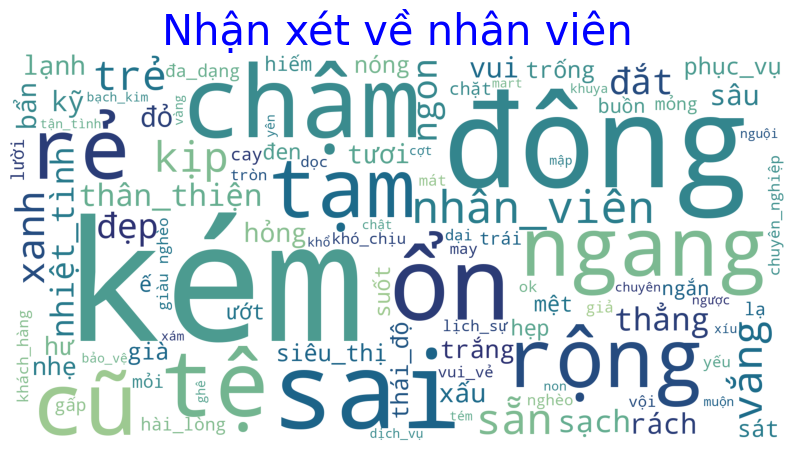

In [148]:

cloud = " ".join(nv_a)

plt.figure(figsize=(10, 8))
wc = WordCloud(
    max_words=100,
    background_color="white",
    colormap=sns.color_palette("crest", as_cmap=True),
    width=2000, height=1000
).generate(cloud)

plt.imshow(wc)
plt.axis("off")
plt.title("Nhận xét về nhân viên", fontsize=30, color="blue")
plt.show()

In [149]:
nv_counts = Counter(nv_a)
top_10_nv = nv_counts.most_common(10)
print(top_10_nv)


[('kém', 156), ('đông', 84), ('sai', 55), ('ổn', 49), ('chậm', 48), ('tệ', 36), ('cũ', 36), ('rẻ', 34), ('rộng', 32), ('ngang', 32)]


# HÀNG

In [150]:
hang = df1[df1['preprocess'].str.contains(r'\bhàng\b', regex=True)]
hang

,comment,stars,sentiment,preprocess
0,nhiều hàng hoá để lựa chọn thường xuyên có chư...,5,Trung tính,hàng hóa lựa_chọn thường_xuyên chương_trình kh...
2,hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở q...,1,Trung tính,hôm_nay tầm tiền quầy thu ngân_tầng bích trườn...
13,nhiều lựa chọn mặt hàng vải lanh quần áo hàng ...,5,Tiêu cực,lựa_chọn mặt_hàng vải_lanh quần_áo hàng tạp_hó...
17,hàng hoá phong phú cơ sở vật chất thì quá chật...,3,Trung tính,hàng hóa phong_phú cơ_sở vật_chất chật_hẹp nhâ...
18,nhân viên thu ngân ở coopmart cong quynh có lẽ...,1,Tiêu cực,nhân_viên thu_ngân coopmart cong_quynh có_lẽ t...
...,...,...,...,...
31668,để thời gian giờ mà bửa mình qua là giờ đóng c...,3,Tiêu cực,bửa đóng_cửa nhân_viên vui_vẽ mk_nghĩ tư_vấn n...
31671,hàng hoá chưa được đa dạng bằng các coop lớn k...,3,Trung tính,hàng hóa đa_dạng coop quầy hàng vải lộn_xộn sắ...
31672,hàng đa dạng nhưng nhân viên thu ngân quá ít v...,3,Tiêu cực,hàng đa_dạng nhân_viên thu ngân chậm
31675,hàng hoá không đa dạng không có đủ tem giá,3,Tiêu cực,hàng hóa đa_dạng tem


In [151]:
for comment in hang['comment'].head(10):
    print(f'Bình luận: {comment}''\n---------------------------------------------------------------------------')


Bình luận: nhiều hàng hoá để lựa chọn thường xuyên có chương trình khuyến mãi nhân viên vui vẻ nhiệt tình
---------------------------------------------------------------------------
Bình luận: hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở quầy thu ngân tầng trệt tên là bích tôi gặp trường hợp như sau chị nhân viên thái độ với khách với tôi ra mặt luôn không hiểu chị gặp vấn đề gì nữa chắc tới tháng vợ tôi là khách hàng thẻ bạch kim không nhiều cũng không ít trong lúc tính tiền không hiểu lỗ tai chị có bị tật hay chưa ngoáy hỏi cùng câu hỏi tới tận lần mà đến câu hỏi lúc tính tiền thì chị đó quăng những món hàng chúng tôi với thái độ rất khó chịu nghe tiếng luôn mà nói chung thái độ nhân viên thấp kém vô văn hoá không hiểu sao chúng tôi đã mua hàng và rồi bị thêm những cảm xúc tiêu cực như vậy vì lần đầu tôi sẽ không đưa hình ảnh chị lên mong chị đọc được thì ráng mà cải thiện giúp
---------------------------------------------------------------------------
Bình luận: nhiều lựa chọn mặt h

In [152]:
pos_h = []
for i in hang['preprocess']:
  pos = pos_tag(str(i))
  pos_h.append(pos)

In [153]:
h_a = []

for sentence in pos_h:
    for word, tag in sentence:
        if tag == 'A' :
            h_a.append(word)


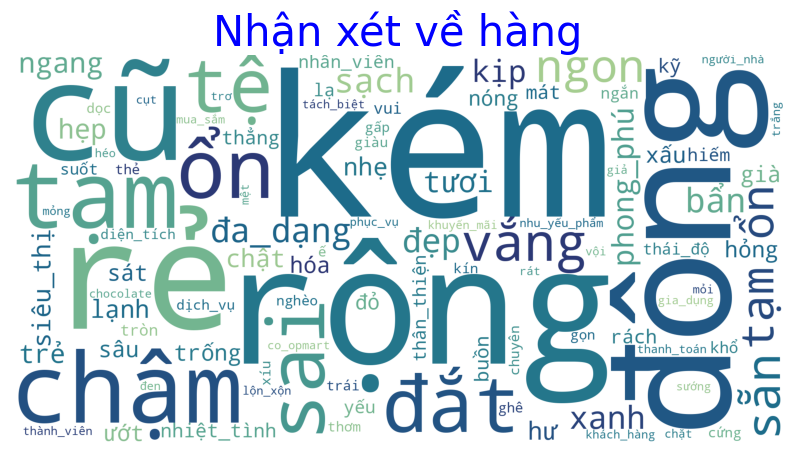

In [154]:
cloud = " ".join(h_a)

plt.figure(figsize=(10, 8))
wc = WordCloud(
    max_words=100,
    background_color="white",
    colormap=sns.color_palette("crest", as_cmap=True),
    width=2000, height=1000
).generate(cloud)

plt.imshow(wc)
plt.axis("off")
plt.title("Nhận xét về hàng", fontsize=30, color="blue")
plt.show()

In [155]:
h_counts = Counter(h_a)
top_10_h = h_counts.most_common(10)
print(top_10_h)


[('kém', 92), ('rộng', 62), ('tạm', 60), ('đông', 57), ('rẻ', 52), ('ổn', 50), ('chậm', 42), ('cũ', 42), ('sai', 29), ('đắt', 28)]


# GỬI

In [156]:
gui = df1[df1['preprocess'].str.contains(r'\bgiữ\b|\bgởi\b|\bgửi\b', regex=True)]
gui

,comment,stars,sentiment,preprocess
6,hôm qua em có đến đây mua ít đồ bạn em bảo xin...,1,Trung tính,hôm_qua mua bảo_xinh chụp quầy cân hoa_quả nhâ...
49,vào mua đồ p gửi xe thu không chiếc ô tô xe đã...,1,Tiêu cực,mua p gửi xe thu ô_tô xe ngăn_nắp chìa khóa cô_lí
65,dịch vụ gửi xe rất tệ sáng hôm nay mình gửi xe...,1,Tiêu cực,dịch_vụ gửi xe tệ hôm_nay gửi xe siêu_thị chạy...
110,nhân viên gửi xe bắt khách hàng dời xe tới lui...,1,Tiêu cực,nhân_viên gửi xe khách_hàng dời_xe tới_lui khó...
183,một buổi chiều muộn chủ nhật tôi đi mua sắm ở ...,5,Trung tính,chiều muộn chủ_nhật mua_sắm coopmart đường cốn...
...,...,...,...,...
30462,hàng hoá đầy đủ so với mặt bằng tỉnh lẻ so với...,4,Trung tính,hàng hóa đầy_đủ mặt_bằng tỉnh_lẻ gửi xe tốn phí
30623,nhiều đồ đạc bãi gửi xe rộng,5,Trung tính,đồ_đạc bãi gửi xe rộng
31213,đây la siêu thị phải trả tiền gửi xe,5,Tiêu cực,la siêu_thị tiền gửi xe
31397,địa điểm mua hàng hoá tốt tuy nhiên về thiết k...,4,Tiêu cực,địa_điểm mua hàng hóa thiết_kế tầng tách_biệt ...


In [157]:
for comment in gui['comment'].head(10):
    print(f'Bình luận: {comment}''\n---------------------------------------------------------------------------')

Bình luận: hôm qua em có đến đây mua ít đồ bạn em bảo xinh nên muốn chụp vài tấm hình cho em sau đó em lại quầy cân hoa qủa chị nhân viên rất thái độ với em bạn em mới bảo nãy chụp hình c ấy nhìn nhìn kiểu liếc liếc em thắc mắc siêu thị cấm chụp hình ạ mà em chụp em cũng mua đòồ mà mắc gì thái độ với em cân cũng không nói đưa thì liếc bỉu môi omg tụt mood kinh khủng tiếp theo là em mua lốc sữa fami thấy giá để có khuyến mãi nhưng tính tiền không có em tính trên lầu xuống trệt hỏi em lại hỏi nhân viên thì anh đó bảo sai rồi kiu anh khác đi lấy cái gì đó ay làm gì đó em không biết bắt em đợi cỡ không nói câu nào em tính về rồi thì anh kia ra gửi lại tiền cho em kêu em ký tên gì đó rồi em tính tiền lại đi về hoàn toàn không nhận được lời xin lỗi nào đề nghị đào tạo lại tất cả nhân viên ở đây khâu chăm sóc khách hàng nhé thất vọng
---------------------------------------------------------------------------
Bình luận: vào mua đồ p gửi xe thu không chiếc ô tô xe đã vào ô ngăn nắp vẫn bắt khác

In [158]:
pos_g = []
for i in gui['preprocess']:
  pos = pos_tag(str(i))
  pos_g.append(pos)

In [159]:
g_a = []

for sentence in pos_h:
    for word, tag in sentence:
        if tag == 'A' :
            g_a.append(word)


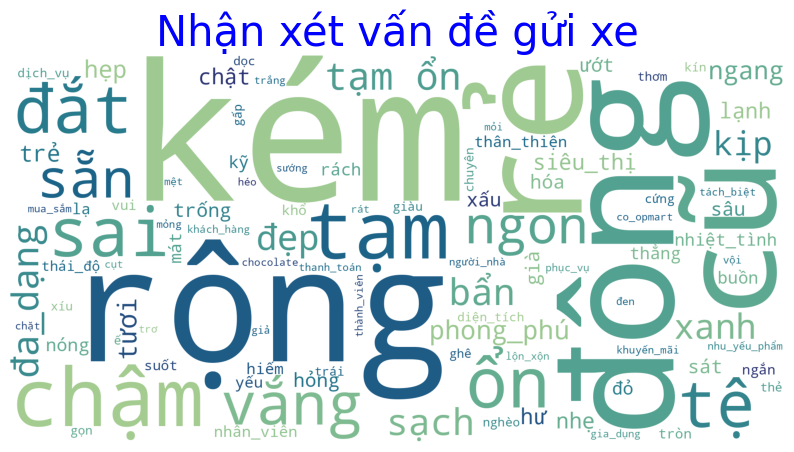

In [160]:
cloud = " ".join(g_a)

plt.figure(figsize=(10, 8))
wc = WordCloud(
    max_words=100,
    background_color="white",
    colormap=sns.color_palette("crest", as_cmap=True),
    width=2000, height=1000
).generate(cloud)

plt.imshow(wc)
plt.axis("off")
plt.title("Nhận xét vấn đề gửi xe", fontsize=30, color="blue")
plt.show()

In [161]:
g_counts = Counter(g_a)
top_10_g = g_counts.most_common(10)
print(top_10_g)


[('kém', 92), ('rộng', 62), ('tạm', 60), ('đông', 57), ('rẻ', 52), ('ổn', 50), ('chậm', 42), ('cũ', 42), ('sai', 29), ('đắt', 28)]


# MUA

In [162]:
mua = df1[df1['preprocess'].str.contains(r'\bmua\b', regex=True)]
mua

,comment,stars,sentiment,preprocess
2,hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở q...,1,Trung tính,hôm_nay tầm tiền quầy thu ngân_tầng bích trườn...
6,hôm qua em có đến đây mua ít đồ bạn em bảo xin...,1,Trung tính,hôm_qua mua bảo_xinh chụp quầy cân hoa_quả nhâ...
8,máy in phiếu tích điểm hư mình tới thanh toán ...,1,Tiêu cực,máy_in phiếu tích_điểm hư thanh_toán phiếu đọc...
16,có nhiều loại giá cả hợp lý nhưng điều quan tr...,3,Trung tính,giá_cả hợp_lý uống lạnh bia mua bia lạnh ngạc_...
20,nhân viên tính tiền không linh hoạt chủ nhật k...,1,Tiêu cực,nhân_viên tiền linh_hoạt chủ_nhật nhân_viên th...
...,...,...,...,...
31237,tưởng tết có mở cửa ai ngờ mùng để mua truyện đọc,5,Trung tính,tưởng tết mở_cửa ai_ngờ mùng mua truyện đọc
31397,địa điểm mua hàng hoá tốt tuy nhiên về thiết k...,4,Tiêu cực,địa_điểm mua hàng hóa thiết_kế tầng tách_biệt ...
31406,tung tam mua sam dang tinh cay,5,Trung tính,tung tam mua sam dang tinh_cay
31516,tương đối đáp ứng nhu cầu người mua nhưng các ...,4,Trung tính,tương_đối đáp_ứng nhu_cầu mua quầy kèm fahasha...


In [163]:
for comment in mua['comment'].head(10):
    print(f'Bình luận: {comment}''\n---------------------------------------------------------------------------')

Bình luận: hôm nay ngày lúc tầm giờ giờ tôi tính tiền ở quầy thu ngân tầng trệt tên là bích tôi gặp trường hợp như sau chị nhân viên thái độ với khách với tôi ra mặt luôn không hiểu chị gặp vấn đề gì nữa chắc tới tháng vợ tôi là khách hàng thẻ bạch kim không nhiều cũng không ít trong lúc tính tiền không hiểu lỗ tai chị có bị tật hay chưa ngoáy hỏi cùng câu hỏi tới tận lần mà đến câu hỏi lúc tính tiền thì chị đó quăng những món hàng chúng tôi với thái độ rất khó chịu nghe tiếng luôn mà nói chung thái độ nhân viên thấp kém vô văn hoá không hiểu sao chúng tôi đã mua hàng và rồi bị thêm những cảm xúc tiêu cực như vậy vì lần đầu tôi sẽ không đưa hình ảnh chị lên mong chị đọc được thì ráng mà cải thiện giúp
---------------------------------------------------------------------------
Bình luận: hôm qua em có đến đây mua ít đồ bạn em bảo xinh nên muốn chụp vài tấm hình cho em sau đó em lại quầy cân hoa qủa chị nhân viên rất thái độ với em bạn em mới bảo nãy chụp hình c ấy nhìn nhìn kiểu liếc li

In [164]:
pos_m = []
for i in mua['preprocess']:
  pos = pos_tag(str(i))
  pos_m.append(pos)

In [165]:
m_a = []

for sentence in pos_m:
    for word, tag in sentence:
        if tag == 'A' :
            m_a.append(word)


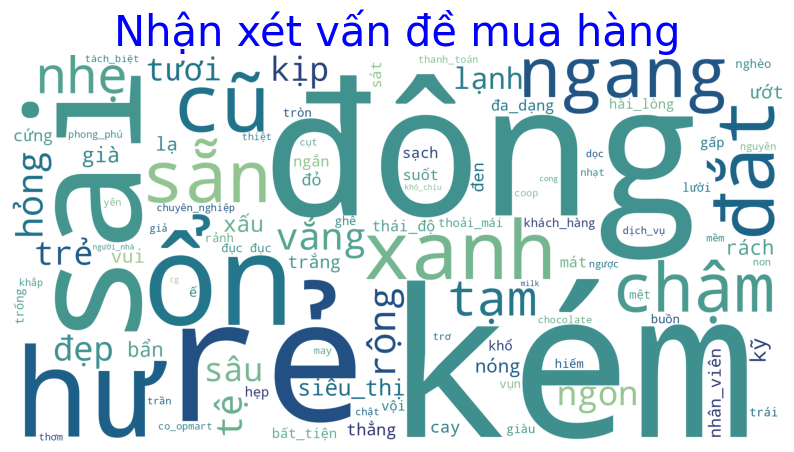

In [166]:
cloud = " ".join(m_a)

plt.figure(figsize=(10, 8))
wc = WordCloud(
    max_words=100,
    background_color="white",
    colormap=sns.color_palette("crest", as_cmap=True),
    width=2000, height=1000
).generate(cloud)

plt.imshow(wc)
plt.axis("off")
plt.title("Nhận xét vấn đề mua hàng", fontsize=30, color="blue")
plt.show()

In [167]:
m_counts = Counter(m_a)
top_10_m = m_counts.most_common(10)
print(top_10_m)


[('kém', 58), ('đông', 46), ('rẻ', 40), ('sai', 33), ('ổn', 31), ('hư', 29), ('xanh', 29), ('cũ', 29), ('đắt', 28), ('sẵn', 27)]
